# NumPy Tutorial

## Introduction

Python is a great general-purpose programming language on its own, but with the help of a few popular libraries (numpy, scipy, matplotlib) it becomes a powerful environment for scientific computing.

* Basic Python: Basic data types (Containers, Lists, Dictionaries, Sets, Tuples), Functions, Classes
* Numpy: Arrays, Array indexing, Datatypes, Array math, Broadcasting
* Matplotlib: Plotting, Subplots, Images
* IPython: Creating notebooks, Typical workflows

## Basics of Python

Python is a high-level, dynamically typed multiparadigm programming language. Python code is often said to be almost like pseudocode, since it allows you to express very powerful ideas in very few lines of code while being very readable. As an example, here is an implementation of the classic quicksort algorithm in Python:

In [1]:
def quicksort(arr):
    if len(arr) <= 1:
        return arr
    pivot = arr[len(arr) // 2]
    left = [x for x in arr if x < pivot]
    middle = [x for x in arr if x == pivot]
    right = [x for x in arr if x > pivot]
    return quicksort(left) + middle + quicksort(right)

print (quicksort([3,6,8,10,1,2,1]))

[1, 1, 2, 3, 6, 8, 10]


#### Lists

A list is the Python equivalent of an array, but is resizeable and can contain elements of different types:

In [2]:
xs = [3, 1, 2]   # Create a list
print (xs, xs[2])
print (xs[-1])     # Negative indices count from the end of the list; prints "2"

[3, 1, 2] 2
2


In [3]:
xs[2] = 'foo'    # Lists can contain elements of different types
print (xs)

[3, 1, 'foo']


In [4]:
xs.append('bar') # Add a new element to the end of the list
print (xs)  

[3, 1, 'foo', 'bar']


#### Slicing

In addition to accessing list elements one at a time, Python provides concise syntax to access sublists; this is known as slicing:

In [5]:
nums = list(range(5))    # range is a built-in function that creates a list of integers
print (nums)         # Prints "[0, 1, 2, 3, 4]"
print (nums[2:4])    # Get a slice from index 2 to 4 (exclusive); prints "[2, 3]"
print (nums[2:])     # Get a slice from index 2 to the end; prints "[2, 3, 4]"
print (nums[:2])     # Get a slice from the start to index 2 (exclusive); prints "[0, 1]"
print (nums[:])      # Get a slice of the whole list; prints ["0, 1, 2, 3, 4]"
print (nums[:-1])    # Slice indices can be negative; prints ["0, 1, 2, 3]"
nums[2:4] = [8, 9] # Assign a new sublist to a slice
print (nums)         # Prints "[0, 1, 8, 9, 4]"

[0, 1, 2, 3, 4]
[2, 3]
[2, 3, 4]
[0, 1]
[0, 1, 2, 3, 4]
[0, 1, 2, 3]
[0, 1, 8, 9, 4]


#### Loops

You can loop over the elements of a list like this:

In [68]:
animals = ['cat', 'dog', 'monkey']
for i in animals:
    print (i)

cat
dog
monkey


If you want access to the index of each element within the body of a loop, use the built-in `enumerate` function:

In [69]:
animals = ['cat', 'dog', 'monkey']
for idx, animal in enumerate(animals):
    print ('#%d: %s' % (idx + 1, animal))

#1: cat
#2: dog
#3: monkey


#### List comprehensions:

When programming, frequently we want to transform one type of data into another. As a simple example, consider the following code that computes square numbers:

In [71]:
nums = [0, 1, 2, 3, 4,5]
squares = []
for x in nums:
    squares.append(x ** 2)
print (squares)

[0, 1, 4, 9, 16, 25]


You can make this code simpler using a list comprehension:

In [72]:
nums = [0, 1, 2, 3, 4]
squares = [x ** 2 for x in nums]
print (squares)

[0, 1, 4, 9, 16]


List comprehensions can also contain conditions:

In [73]:
nums = [0, 1, 2, 3, 4]
even_squares = [x ** 2 for x in nums if x % 2 == 0]
print (even_squares)

[0, 4, 16]


#### Dictionaries

A dictionary stores (key, value) pairs, similar to a `Map` in Java or an object in Javascript. You can use it like this:

In [74]:
d = {'cat': 'cute', 'dog': 'furry'}  # Create a new dictionary with some data
print (d['cat'])       # Get an entry from a dictionary; prints "cute"
print ('cat' in d)      # Check if a dictionary has a given key; prints "True"

cute
True


In [75]:
d['fish'] = 'wet'    # Set an entry in a dictionary
print (d['fish'])      # Prints "wet"

wet


In [77]:
print (d['monkey'])  # KeyError: 'monkey' not a key of d

KeyError: 'monkey'

In [78]:
print (d.get('monkey', 'N/A'))  # Get an element with a default; prints "N/A"
print (d.get('fish', 'N/A'))    # Get an element with a default; prints "wet"

N/A
wet


In [79]:
del (d['fish'])        # Remove an element from a dictionary
print (d.get('fish', 'N/A')) # "fish" is no longer a key; prints "N/A"

N/A


You can find all you need to know about dictionaries in the [documentation](https://docs.python.org/2/library/stdtypes.html#dict).

It is easy to iterate over the keys in a dictionary:

In [80]:
d = {'person': 2, 'cat': 4, 'spider': 8}
for animal in d:
    legs = d[animal]
    print ('A %s has %d legs' % (animal, legs))

A person has 2 legs
A cat has 4 legs
A spider has 8 legs


If you want access to keys and their corresponding values, use the iteritems method:

In [17]:
d = {'person': 2, 'cat': 4, 'spider': 8}
for animal, legs in d.items():
    print ('A %s has %d legs' % (animal, legs))

A person has 2 legs
A cat has 4 legs
A spider has 8 legs


Dictionary comprehensions: These are similar to list comprehensions, but allow you to easily construct dictionaries. For example:

In [18]:
nums = [0, 1, 2, 3, 4]
even_num_to_square = {x: x ** 2 for x in nums if x % 2 == 0}
print (even_num_to_square)

{0: 0, 2: 4, 4: 16}


#### Tuples

A tuple is an (immutable) ordered list of values. A tuple is in many ways similar to a list; one of the most important differences is that tuples can be used as keys in dictionaries and as elements of sets, while lists cannot. Here is a trivial example:

In [19]:
d = {(x, x + 1): x for x in range(10)}  # Create a dictionary with tuple keys
t = (5, 6)       # Create a tuple
print (type(t))
print (d[t])       
print (d[(1, 2)])

<class 'tuple'>
5
1


In [20]:
t[0] = 1

TypeError: 'tuple' object does not support item assignment

## Numpy

* Core library for scientific computing in Python. 
* Provides a high-performance multidimensional array object, and tools for working with these arrays.

In [1]:
import numpy as np

### Arrays

* A numpy array is a grid of values, all of the same type, and is indexed by a tuple of nonnegative integers.
* The number of dimensions is the rank of the array. 
* The shape of an array is a tuple of integers giving the size of the array along each dimension.

We can initialize numpy arrays from nested Python lists, and access elements using square brackets:

In [2]:
b=[1,2,3,5]

print(b)

print(b[0],b[3])

a = np.array(b)  # Rank 1 array

print(a)

print(type(a), a.shape, a[0], a[1], a[2])



[1, 2, 3, 5]
1 5
[1 2 3 5]
<class 'numpy.ndarray'> (4,) 1 2 3


In [3]:
b=[1,2,3,4]
print(b)
a=np.array([1,2,3,4])
print(a)
print(a[0],a[2])
print(a.shape)

[1, 2, 3, 4]
[1 2 3 4]
1 3
(4,)


In [5]:
c=[[1,2,3],[4,5,6]]
print(c)
b = np.array(c)   # Rank 2 array
print (b)
print(b.shape)
print(type(b))

[[1, 2, 3], [4, 5, 6]]
[[1 2 3]
 [4 5 6]]
(2, 3)
<class 'numpy.ndarray'>


In [6]:
print (b.shape)
print (b[0, 0], b[0, 1], b[1, 0])

(2, 3)
1 2 4


Numpy also provides many functions to create arrays:

In [4]:
a = np.zeros((6,20))  # Create an array of all zeros
print (a)

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [5]:
b = np.ones((6,20))   # Create an array of all ones
print (b)

[[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]]


In [6]:
c = np.full((6,20),33) # Create a constant array
print (c) 

[[33 33 33 33 33 33 33 33 33 33 33 33 33 33 33 33 33 33 33 33]
 [33 33 33 33 33 33 33 33 33 33 33 33 33 33 33 33 33 33 33 33]
 [33 33 33 33 33 33 33 33 33 33 33 33 33 33 33 33 33 33 33 33]
 [33 33 33 33 33 33 33 33 33 33 33 33 33 33 33 33 33 33 33 33]
 [33 33 33 33 33 33 33 33 33 33 33 33 33 33 33 33 33 33 33 33]
 [33 33 33 33 33 33 33 33 33 33 33 33 33 33 33 33 33 33 33 33]]


In [7]:
d = np.eye(10)        # Create a 2x2 identity matrix
print (d)

[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


In [18]:
e = np.random.random((6,3)) # Create an array filled with random values
e

array([[0.52756782, 0.2698334 , 0.39828546],
       [0.71160679, 0.63971174, 0.92078084],
       [0.81390892, 0.82526339, 0.68027691],
       [0.93700161, 0.42478084, 0.1872355 ],
       [0.94377333, 0.88210683, 0.51991783],
       [0.64098389, 0.8533055 , 0.72518195]])

In [17]:
arr1=np.empty([6,3])
arr1

array([[0.15822178, 0.87915617, 0.11645233],
       [0.39483089, 0.95294088, 0.32052054],
       [0.81300347, 0.71309348, 0.34604464],
       [0.02544197, 0.2911135 , 0.46082422],
       [0.15607034, 0.5552114 , 0.87824375],
       [0.11731105, 0.93172546, 0.03220837]])

### Array indexing

Slicing: Similar to Python lists, numpy arrays can be sliced. Since arrays may be multidimensional, you must specify a slice for each dimension of the array:

In [22]:
import numpy as np

# Rank 2 array with shape (3, 4)
# [[ 1  2  3  4]
#  [ 5  6  7  8]
#  [ 9 10 11 12]]
a = np.array([[1,2,3,4], [5,6,7,8], [9,10,11,12]])
print(a)
print(a.shape)
# Rows 0, 1; Columns 1,2; shape (2, 2)
# [[2 3]
#  [6 7]]

#c=a[:,:]
b = a[1:3, :2]
print (b)
print(type(b),b.shape)

[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]]
(3, 4)
[[ 5  6]
 [ 9 10]]
<class 'numpy.ndarray'> (2, 2)


In [23]:
b

array([[ 5,  6],
       [ 9, 10]])

In [24]:
b[0,0]=500
print(b)

[[500   6]
 [  9  10]]


In [25]:
a

array([[  1,   2,   3,   4],
       [500,   6,   7,   8],
       [  9,  10,  11,  12]])

In [18]:
b=a[1:3,:2]
print(b)
print(b.shape)
print(b.dtype,type(b))
print(b.size)
b[0,0]=100
print(b)
print(a)
b[0,1]=122
print(a)

[[100 122]
 [  9  10]]
(2, 2)
int64 <class 'numpy.ndarray'>
4
[[100 122]
 [  9  10]]
[[  1   2   3   4]
 [100 122   7   8]
 [  9  10  11  12]]
[[  1   2   3   4]
 [100 122   7   8]
 [  9  10  11  12]]


A slice of an array is a view into the same data, so modifying it will modify the original array.

In [30]:
print (a[0, 1])  
b[0, 0] = 77    # b[0, 0] is the same piece of data as a[0, 1]
print (a[0, 1])
print(a)
print(b)
a[2,0]=100
print(a)
print(b)

2
2
[[  1   2   3   4]
 [ 77 122   7   8]
 [  9  10  11  12]]
[[ 77 122]
 [  9  10]]
[[  1   2   3   4]
 [ 77 122   7   8]
 [100  10  11  12]]
[[ 77 122]
 [100  10]]


We can also mix integer indexing with slice indexing. It yields an array of lower rank than the original array. 

In [2]:
# Rank 2 array, shape (3, 4)
a = np.array([[1,2,3,4], [5,6,7,8], [9,10,11,12]])
print (a)

[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]]


In [3]:
a.shape

(3, 4)

In [9]:
print(a[:])


[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]]


In [ ]:
a[:,:]  # a[row slice-:,col slice-:]

In [10]:
a[1:2,:] # row slicing

array([[5, 6, 7, 8]])

In [11]:
a[:,:1] # col slicing

array([[1],
       [5],
       [9]])

In [12]:
print(a)

[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]]


Two ways of accessing the data in the middle row of the array.
Mixing integer indexing with slices yields an array of lower rank,
while using only slices yields an array of the same rank as the
original array:

In [13]:
row_r1 = a[1, :]    # Rank 1 view of the second row of a  
row_r2 = a[1:2, :]  # Rank 2 view of the second row of a
row_r3 = a[[1], :]  # Rank 2 view of the second row of a
print (row_r1, row_r1.shape)
print (row_r2, row_r2.shape)
print (row_r3, row_r3.shape)

[5 6 7 8] (4,)
[[5 6 7 8]] (1, 4)
[[5 6 7 8]] (1, 4)


In [14]:
a

array([[ 1,  2,  3,  4],
       [ 5,  6,  7,  8],
       [ 9, 10, 11, 12]])

In [15]:
# Same distinction when accessing columns of an array:
col_r1 = a[:, 1]
col_r2 = a[:, 1:2]
col_r3 = a[:, [1]]
print (col_r1, col_r1.shape)
print (col_r2, col_r2.shape)
print (col_r3, col_r3.shape)

[ 2  6 10] (3,)
[[ 2]
 [ 6]
 [10]] (3, 1)
[[ 2]
 [ 6]
 [10]] (3, 1)


Integer array indexing: When you index into numpy arrays using slicing, the resulting array view will always be a subarray of the original array. In contrast, integer array indexing allows you to construct arbitrary arrays using the data from another array.

In [16]:
a = np.array([[1,2], [3, 4], [5, 6]])
print (a)
print(a.shape)
# Integer array indexing.
# The returned array shape (3,)
print (a[[0, 1, 2], [0, 1, 0]])

# Equivalent to this:
print (np.array([a[0, 0], a[1, 1], a[2, 0]]))

print(a[1][0])

[[1 2]
 [3 4]
 [5 6]]
(3, 2)
[1 4 5]
[1 4 5]
3


In [17]:
# Integer array indexing: can reuse the same element from the source array
print (a[[0, 0], [1, 1]])

# Equivalent to
print (np.array([a[0, 1], a[0, 1]]))

[2 2]
[2 2]


One useful trick with integer array indexing is selecting or mutating one element from each row of a matrix:

In [18]:
# Create a new array
a = np.array([[1,2,3], [4,5,6], [7,8,9], [10, 11, 12]])
print (a)

[[ 1  2  3]
 [ 4  5  6]
 [ 7  8  9]
 [10 11 12]]


In [32]:
# Create an array of indices
b = np.array([1, 1, 2,2])
print(b)
#np.arange(4)

# Select one element from each row of a using the indices in b
print (a[np.arange(4), b])

#print(a)

[1 1 2 2]
[ 2  5  9 12]


In [21]:
a[[0,1, 2, 3],[1, 1, 2, 2]]

array([ 2,  5,  9, 12])

In [19]:
print(np.arange(4))


[0 1 2 3]


In [34]:
# Mutate one element from each row of a using the indices in b
a[np.arange(4), b] += 10 # a=a+10
print (a)

[[ 1 12  3]
 [ 4 15  6]
 [ 7  8 19]
 [10 11 22]]


**Boolean array indexing**: Pick out arbitrary elements of an array. Frequently this type of indexing is used to select the elements of an array that satisfy some condition. 

In [3]:
import numpy as np

a = np.array([[1,2], [3, 4], [5, 6]])
print (a)

bool_idx = (a > 2)  # a[i,j] = True if a[i,j] > 2; otherwise, False
print (bool_idx)
#a>2

[[1 2]
 [3 4]
 [5 6]]
[[False False]
 [ True  True]
 [ True  True]]


In [9]:
aa=a[a>2]
aa.shape

(4,)

In [6]:
# Use boolean array indexing to construct a rank 1 array, consisting of
# the elements of a, corresponding to the True values of bool_idx
#print (a[bool_idx])

# In a single concise statement:
print (a[a > 2])

[3 4 5 6]


### Datatypes

* Every numpy array is a grid of elements of the same type.
* A large set of numeric datatypes for elements.
* Numpy tries to guess a datatype when we create an array
* But functions that construct arrays usually also include an optional argument to explicitly specify the datatype.

In [22]:
x = np.array([1, 2])  # numpy choose the datatype
y = np.array([1.0, 2.0])  # numpy choose the datatype
z = np.array([1, 2], dtype=np.float64)
# We choose a particular datatype
#a=np.array(['hello',454,10.55])

print (x.dtype, y.dtype, z.dtype)
#print(a.dtype)
print(x)

int32 float64 float64
[1 2]


### Array math

* Basic mathematical functions operate elementwise on arrays
* Available both as operator overloads and as functions in the numpy module:

In [10]:
x = np.array([[1,2],[3,4]], dtype=np.float64)
y = np.array([[5,6],[7,8]], dtype=np.float64)

#print(x)
#print(y)
# Elementwise sum; both produce array
print (x + y)

print (np.add(x, y))

[[ 6.  8.]
 [10. 12.]]
[[ 6.  8.]
 [10. 12.]]


In [24]:
# Elementwise difference; both produce array
print (x - y)
print (np.subtract(x, y))

[[-4. -4.]
 [-4. -4.]]
[[-4. -4.]
 [-4. -4.]]


In [11]:
# Elementwise product; both produce the array
print (x * y)
print (np.multiply(x, y))

[[ 5. 12.]
 [21. 32.]]
[[ 5. 12.]
 [21. 32.]]


In [12]:
# Elementwise division; both produce array
# [[ 0.2         0.33333333]
#  [ 0.42857143  0.5       ]]
print (x / y)
print (np.divide(x, y))

[[0.2        0.33333333]
 [0.42857143 0.5       ]]
[[0.2        0.33333333]
 [0.42857143 0.5       ]]


In [13]:
# Elementwise square root; produces the array
# [[ 1.          1.41421356]
#  [ 1.73205081  2.        ]]
print (np.sqrt(x))

[[1.         1.41421356]
 [1.73205081 2.        ]]


Note that unlike MATLAB, `*` is elementwise multiplication, not matrix multiplication. We instead use the dot function to compute inner products of vectors, to multiply a vector by a matrix, and to multiply matrices. dot is available both as a function in the numpy module and as an instance method of array objects:

In [15]:
x = np.array([[1,2],[3,4]])
y = np.array([[5,6],[7,8]])

v = np.array([9,10])
w = np.array([11, 12])

# Inner product of vectors; both produce 219
print (v.dot(w))
print (np.dot(v, w))

219
219


In [20]:
x

array([[1, 2],
       [3, 4]])

In [21]:
y

array([[5, 6],
       [7, 8]])

In [22]:
x.dot(y)

array([[19, 22],
       [43, 50]])

In [19]:
v*w

array([ 99, 120])

In [16]:
# Matrix / vector product; produce a rank 1 array
print (x.dot(v))
print (np.dot(x, v))

[29 67]
[29 67]


In [17]:
# Matrix / matrix product; produce a rank 2 array
print (x.dot(y))
print (np.dot(x, y))

[[19 22]
 [43 50]]
[[19 22]
 [43 50]]


In [18]:
x*y

array([[ 5, 12],
       [21, 32]])

Numpy provides many useful functions for performing computations on arrays; one of the most useful is `sum`:

In [33]:
x = np.array([[1,2,5,9],[3,4,6,7]])
print(x)
print (np.sum(x))  # Compute sum of all elements; prints "10"
print (np.sum(x, axis=0))  # Compute sum of each column; prints "[4 6]"
print (np.sum(x, axis=1))  # Compute sum of each row; prints "[3 7]"

[[1 2 5 9]
 [3 4 6 7]]
37
[ 4  6 11 16]
[17 20]


Need to reshape or otherwise manipulate data in arrays.

In [23]:
print (x)
print (x.T)

[[1 2]
 [3 4]]
[[1 3]
 [2 4]]


In [48]:
v = np.array([[1,2,3]])
#v = np.array([[1,2,3]])
print (v) 
print(v.shape)
u=v.T
#print (v.T)
print(u.shape)

[[1 2 3]]
(1, 3)
(3, 1)


### Broadcasting

* Broadcasting allows numpy to work with arrays of different shapes when performing arithmetic operations.
* We may have a smaller array and a larger array, and we want to use the smaller array multiple times to perform some operation on the larger array.
* Example: we want to add a constant vector to each row of a matrix.

In [25]:
np.empty((5,5))

array([[6.23042070e-307, 4.67296746e-307, 1.69121096e-306,
        1.60221208e-306, 1.89146896e-307],
       [1.37961302e-306, 1.05699242e-307, 8.01097889e-307,
        1.78020169e-306, 7.56601165e-307],
       [1.02359984e-306, 1.15710088e-306, 6.23056330e-307,
        1.60219578e-306, 7.56601165e-307],
       [6.23061763e-307, 9.34607074e-307, 8.90098127e-307,
        1.11260755e-306, 1.42417629e-306],
       [2.22523140e-306, 1.16820282e-307, 7.23168527e-308,
        2.35545289e-312, 3.39980405e-317]])

In [39]:
np.zeros((2,2))

array([[0., 0.],
       [0., 0.]])

In [44]:
# Add vector v to each row of the matrix x,
# storing the result in the matrix y
x = np.array([[1,2,3], [4,5,6], [7,8,9], [10, 11, 12]])
v = np.array([1, 0, 1])
y = np.empty_like(x)   # Empty matrix with the same shape as x

print (x)
print(y)
print(len(x))
# Add the vector v to each row of the matrix x with an explicit loop
for i in range(len(x)):
    y[i, :] = x[i, :] + v[:]
      
print (y)

print(len(x))

[[ 1  2  3]
 [ 4  5  6]
 [ 7  8  9]
 [10 11 12]]
[[ 1  2  3]
 [ 4  5  6]
 [ 7  8  9]
 [10 11 12]]
4
[[ 2  2  4]
 [ 5  5  7]
 [ 8  8 10]
 [11 11 13]]
4


* When the matrix `x` is very large, computing an explicit loop in Python could be slow.
* Adding the vector v to each row of the matrix `x` is equivalent to forming a matrix `vv` by stacking multiple copies of `v` vertically, then performing elementwise summation of `x` and `vv`.

In [45]:
print(v)
vv = np.tile(v, (4, 1))  # Stack 4 copies of v on top of each other
print (vv)               # Prints "[[1 0 1]
                         #          [1 0 1]
                         #          [1 0 1]
                         #          [1 0 1]]"

[1 0 1]
[[1 0 1]
 [1 0 1]
 [1 0 1]
 [1 0 1]]


In [51]:
y = x + vv  # Add x and vv elementwise
print (y)

[[ 2  2  4]
 [ 5  5  7]
 [ 8  8 10]
 [11 11 13]]


Numpy broadcasting allows us to perform this computation without actually creating multiple copies of v.

In [52]:
import numpy as np

# Add the vector v to each row of the matrix x,
# storing the result in the matrix y
x = np.array([[1,2,3], [4,5,6], [7,8,9], [10, 11, 12]])
v = np.array([1, 0, 1])
y = x + v  # Add v to each row of x using broadcasting
print (y)

[[ 2  2  4]
 [ 5  5  7]
 [ 8  8 10]
 [11 11 13]]


The line `y = x + v` works even though `x` has shape `(4, 3)` and `v` has shape `(3,)` due to broadcasting; this line works as if v actually had shape `(4, 3)`, where each row was a copy of `v`, and the sum was performed elementwise.

Broadcasting two arrays together follows these rules:

1. If the arrays do not have the same rank, prepend the shape of the lower rank array with 1s until both shapes have the same length.
2. The two arrays are said to be compatible in a dimension if they have the same size in the dimension, or if one of the arrays has size 1 in that dimension.
3. The arrays can be broadcast together if they are compatible in all dimensions.
4. After broadcasting, each array behaves as if it had shape equal to the elementwise maximum of shapes of the two input arrays.
5. In any dimension where one array had size 1 and the other array had size greater than 1, the first array behaves as if it were copied along that dimension

Functions that support broadcasting are known as universal functions. You can find the list of all universal functions in the [documentation](http://docs.scipy.org/doc/numpy/reference/ufuncs.html#available-ufuncs).

In [41]:
# Compute outer product of vectors
v = np.array([1,2,3])  # v has shape (3,)
w = np.array([4,5])    # w has shape (2,)
# First reshape v to be a column vector of shape (3, 1);
# we can then broadcast it against w to yield
# an output of shape (3, 2)

print (np.reshape(v, (3, 1)) * w)



[[ 4  5]
 [ 8 10]
 [12 15]]


In [42]:
# Add a vector to each row of a matrix
x = np.array([[1,2,3], [4,5,6]])
# x has shape (2, 3) and v has shape (3,) so they broadcast to (2, 3),

print (x + v)

[[2 4 6]
 [5 7 9]]


In [43]:
# Add a vector to each column of a matrix
# x has shape (2, 3) and w has shape (2,).
# x.T has shape (3,2), when added w has shape (1,2)
print ((x.T + w).T)

[[ 5  6  7]
 [ 9 10 11]]


In [44]:
# Or reshape w to be a row vector of shape (2, 1);
# Broadcast it directly against x
print (x + np.reshape(w, (2, 1)))

[[ 5  6  7]
 [ 9 10 11]]


In [45]:
# Multiply a matrix by a constant:
# x has shape (2, 3). Numpy treats scalars as arrays of shape ();
# these can be broadcast together to shape (2, 3)
print (x * 2)

[[ 2  4  6]
 [ 8 10 12]]


Broadcasting typically makes your code more concise and faster, so you should strive to use it where possible.

This brief overview has touched on many of the important things that you need to know about numpy. Check out the [numpy reference](http://docs.scipy.org/doc/numpy/reference/) to find out much more about numpy.

## Matplotlib

Matplotlib is a plotting library. This is a brief introduction to the `matplotlib.pyplot` module.

In [38]:
import matplotlib.pyplot as plt

By running this special iPython command, we will be displaying plots inline:

In [39]:
%matplotlib inline

### Plotting

The most important function in `matplotlib` is plot, which allows you to plot 2D data. 

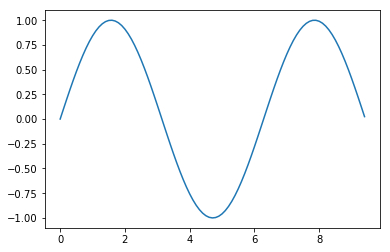

In [43]:
# Compute the x and y coordinates for points on a sine curve
x = np.arange(0, 3 * np.pi, 0.1)
y = np.sin(x)

# Plot the points using matplotlib
plt.plot(x, y)

With just a little bit of extra work we can easily plot multiple lines at once, and add a title, legend, and axis labels:

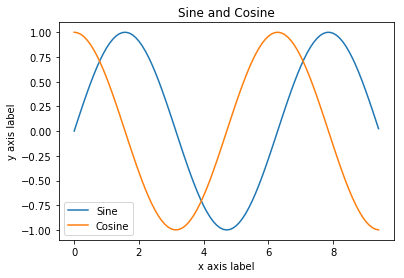

In [66]:
y_sin = np.sin(x)
y_cos = np.cos(x)

# Plot the points using matplotlib
plt.plot(x, y_sin)
plt.plot(x, y_cos)
plt.xlabel('x axis label')
plt.ylabel('y axis label')
plt.title('Sine and Cosine')
plt.legend(['Sine', 'Cosine'])

### Subplots 

We can plot different things in the same figure using the subplot function. 

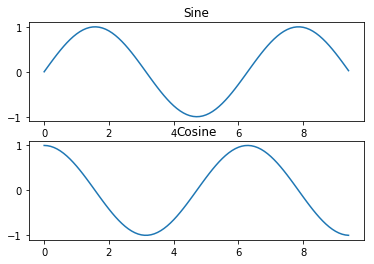

In [47]:
# Compute the x and y coordinates for points on sine and cosine curves
x = np.arange(0, 3 * np.pi, 0.1)
y_sin = np.sin(x)
y_cos = np.cos(x)

# Set up a subplot grid that has height 2 and width 1,
# and set the first such subplot as active.
plt.subplot(2, 1, 1)

# Make the first plot
plt.plot(x, y_sin)
plt.title('Sine')

# Set the second subplot as active, and make the second plot.
plt.subplot(2, 1, 2)
plt.plot(x, y_cos)
plt.title('Cosine')

# Show the figure.
plt.show()

You can read much more about the `subplot` function in the [documentation](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.subplot).